### Aprendizaje no supervisado - Clustering

#### 1) K-means
#### 2) DBSCAN
#### 3) Expectation Maximization using Gaussian Mixture Models (EM-GMM)

#### K-means:
<br> Este algoritmo agrupa los datos en k grupos. Lo hace minimizando la suma de las distancias de los objetos al centroide de su grupo.<br>
<br>A rasgos generales, consta de 3 pasos:<br>
<br>1)Iniciar el agoritmo eligiendo la cantidad de grupos, k, generando k centroides iniciales. La posicion de estos centroides iniciales se escoge aleatoriamente por lo general.<br>
<br>2)Cada objeto del conjunto de datos es asignado al centroide mas cercano.<br>
<br>3)Se actualiza la posicion de cada centroide tomando como nuevo centroide el promedio de las posiciones de cada grupo. <br>
<br>Los pasos 2 y 3 se repiten hasta que los centroides no se mueven o se mueven muy poco (por debajo de una tolerancia ya prefijada)<br>


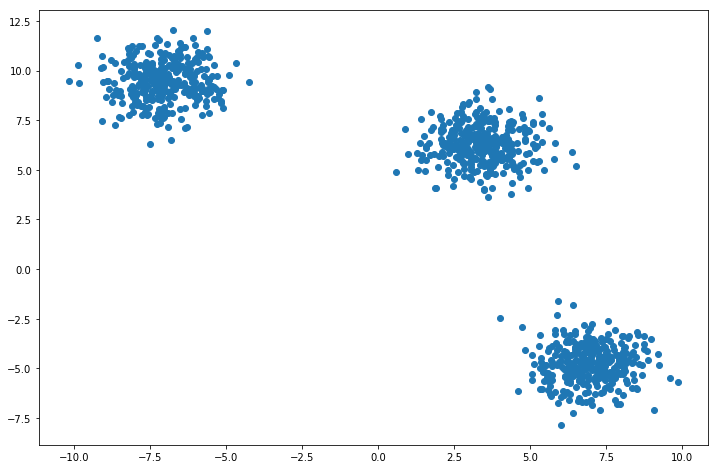

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
random_seed = 1244
xy, val = make_blobs(1000, random_state=random_seed)
plt.figure(figsize=(12, 8))
plt.scatter(xy[:,0], xy[:,1])

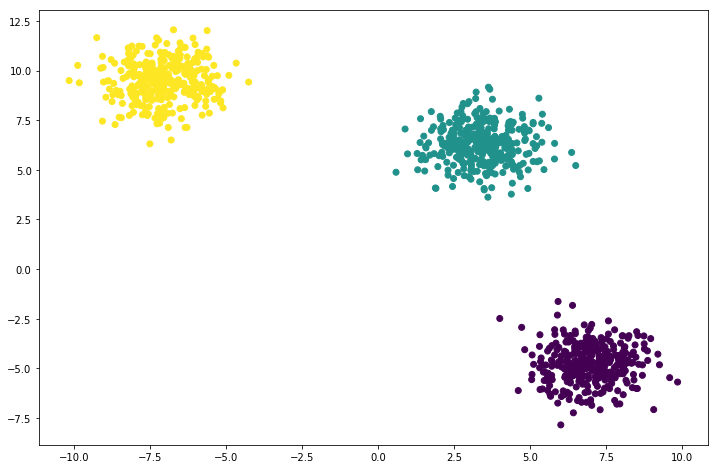

In [2]:
clusters = 3
clf = KMeans(n_clusters=clusters, random_state=random_seed)
labels_pred = clf.fit_predict(xy)
plt.figure(figsize=(12, 8))
plt.scatter(xy[:,0], xy[:,1], c=labels_pred)

#### EM-GMM.
<br>Este algoritmo es mas flexible que K-Means porque se puede adaptar a cualquier tipo de elipse, no solo circulos. EM-GMM asume que los datos estan distribuidos segun una normal (Gaussiana) con media $\mu$ y desviacion $\sigma$.<br>
<br>A cada cluster se le asigna una distribucion normal. Para encontrar los parametros de cada normal correspondientea cada cluster se usa un algoritmo de optimizacion Expectation Optimization (EM)<br>
<br>A rasgos generales, consta de los siguientes pasos:<br>
<br>1) Se inicia el algoritmo eligiendo el numero de clusters (igual que kmeans) e iniciando los centros de las Gaussianas aleatoriamente (o se puede elegir los centros manualmente, mirando previamente los datos)<br>
<br>2) Dada la distribucion normal para cada cluster, se calcula la probabilidad de que cada dato pertenezca a un cluster en particular. Cuanto mas cerca este el dato del centro de la Gaussiana es mas probable que pertenezca al cluster. <br>
<br>3) Basado en las probabilidad calculadas en 2) se calculan nuevos parametros para las Gaussianas, tal que se maximize la probabilidad de que los datas pertenezca a cada cluster. Estos parametros se calculan haciendo un promedio pesado de las posiciones de los datos, donde el peso es la probabilidad de cada dato de pertenecer al cluster<br>
<br>Los pasos 2 y 3 se repiten hasta que los centros de las Gaussianas no se mueven o se mueven muy poco iteracion a iteracion<br>


In [3]:
def make_ellipse (cov, mean, cant, label):
    xy = np.random.multivariate_normal(mean=mean, cov=cov, size=cant)
    xy_val = np.full(cant, label)
    return xy, xy_val

/home/julian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


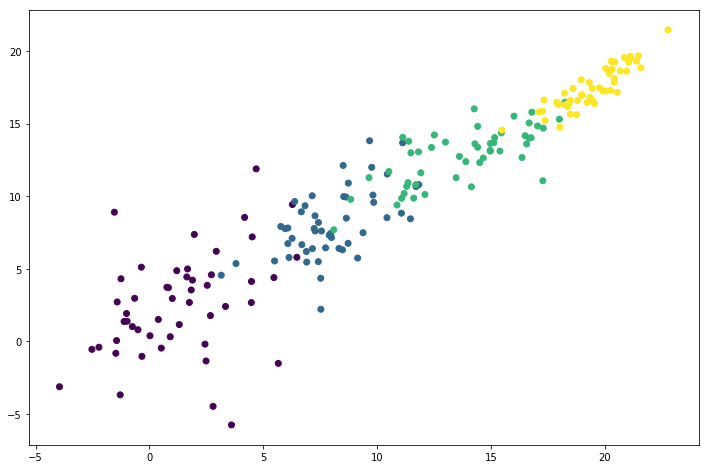

In [4]:
cov1=[[3, 2], [2, 5]]
cov2=[[5, 5], [5, 2]]
cov3=[[2.5, 3], [3, 3]]
mean=[2, 3]
cant=50
i=0
xy_ellip, xy_val_ellip = make_ellipse([[2, 10],[10, 8]], mean, cant, i)

for cov in [cov1, cov2, cov3]:
    i+=1
    mean=[2+6*i, 3+5*i]
    xy_aux, xy_val_aux = make_ellipse(cov, mean, cant, i)
    for j in range(cant):
        xy_ellip = np.append(xy_ellip, xy_aux[j])
        xy_val_ellip = np.append(xy_val_ellip, xy_val_aux[j])
    xy_ellip=xy_ellip.reshape(cant*(i+1), 2)
plt.figure(figsize=(12, 8))
plt.scatter(xy_ellip[:,0], xy_ellip[:,1], c=xy_val_ellip)

Media de cada gaussiana: 
 [[19.01694804 16.97322205]
 [ 0.89660173  1.92093392]
 [ 7.4578283   7.62045471]
 [12.91275387 12.449029  ]]
Matriz de covarianza de cada Gaussiana: 
 [[[2.76034311 2.68279977]
  [2.68279977 3.06389002]]

 [[4.70682218 1.24101384]
  [1.24101384 9.88623353]]

 [[3.43940132 1.60924931]
  [1.60924931 4.19382208]]

 [[5.66158709 2.44384258]
  [2.44384258 3.30521606]]]


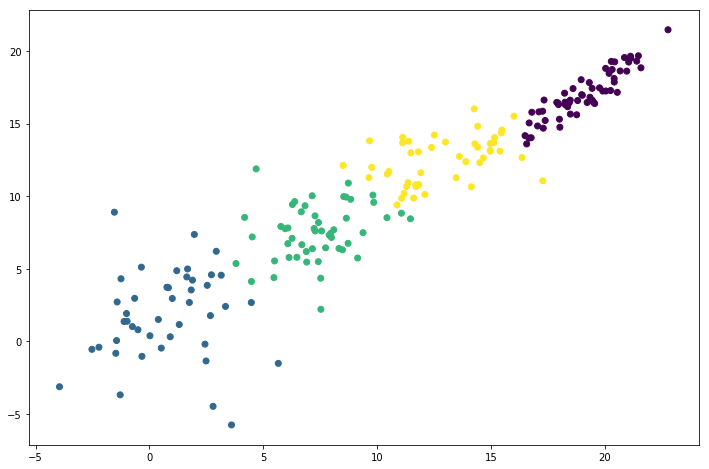

In [5]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4) 
gmm.fit(xy_ellip)#Cuando se fitea el modelo es cuando se obtienen las matrices de covarianza y las medias de cada Gaussiana. No es un fit de "training" comun, como en un entrenamiento supervisado.
#es un "fit" en el cual se obtienen los parametros de la gaussiana que modela los datos.
print('Media de cada gaussiana: \n {0}'.format(gmm.means_))
print('Matriz de covarianza de cada Gaussiana: \n {0}'.format(gmm.covariances_))
plt.figure(figsize=(12, 8))
plt.scatter(xy_ellip[:,0], xy_ellip[:,1], c=gmm.predict(xy_ellip))
#Notar que las medias y las covarianzas dan parecido a las usadas para generar los datos.

#### DBSCAN
<br>Este algoritmo clasifica los puntos en clusters dependiendo de la proximidad entre ellos. Utiliza dos parametros iniciales: $\epsilon$ y MinPts. El algoritmo empieza en un punto arbitrario y se fija en un radio $\epsilon$ si hay por lo menos MinPts en el, si lo hay, considera el punto en cuestion un nucleo e inicia un cluster en el. Luego visita todos los demas puntos, pudiendo suceder tres situaciones para cada punto:<br>
<br>-Si el punto esta en una vecindad $\epsilon$, se incluye en el cluster de dicha vecindad. <br>
<br>-Si el punto no esta en una vecindad $\epsilon$ y su propia vecindad tiene una cantidad MinPts de puntos, se lo considera un nucleo.<br>
<br>-En caso contrario, es ruido.<br>
<br>NOTA: Cuanto mas grande sea la cantidad de datos, mayor será el tamaño de MinPts, para clasificar correctamente el ruido.<br>


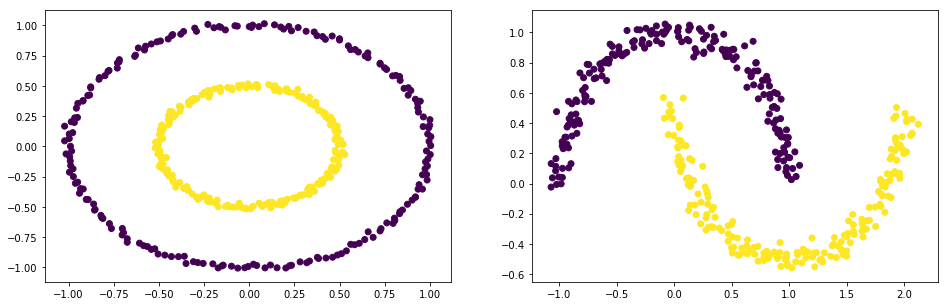

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons, make_circles

xy_circles, xy_circles_val = make_circles(random_state=random_seed, n_samples=400, noise=0.013, factor=0.5)
xy_moons, xy_moons_val = make_moons(random_state=random_seed, n_samples=400, noise=0.05)
fig, ax = plt.subplots(1,2, figsize=(16, 5))
ax[0].scatter(xy_circles[:,0], xy_circles[:,1], c=xy_circles_val)
ax[1].scatter(xy_moons[:,0], xy_moons[:,1], c=xy_moons_val)

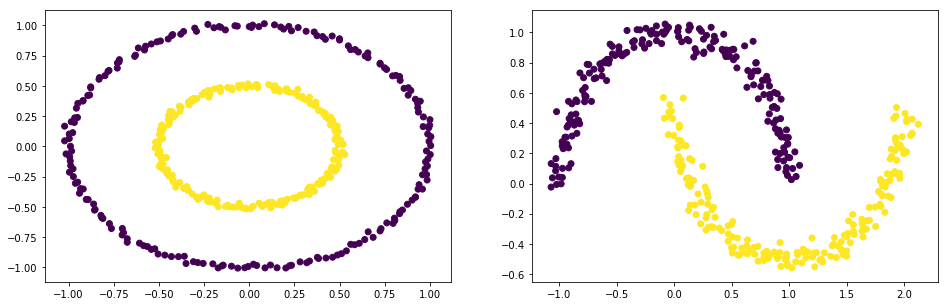

In [7]:
#para los circulos
eps_c = 0.1
minPts_c = 3
clf_DB_c = DBSCAN(eps_c, min_samples=minPts_c)
pred_circles = clf_DB_c.fit_predict(xy_circles)
#para las lunas
eps_m = 0.2
minPts_m=5
clf_DB_m = DBSCAN(eps_m, min_samples=minPts_m)
pred_moons = clf_DB_m.fit_predict(xy_moons)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(xy_circles[:,0], xy_circles[:,1], c=pred_circles)
ax[1].scatter(xy_moons[:,0], xy_moons[:,1], c=pred_moons)